## KNN Regressor

In [1]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=2, noise=10, random_state=42)

In [9]:
import pandas as pd
pd.DataFrame(X)


,0,1
0,-0.167118,0.146714
1,-0.020902,0.117327
2,0.150419,0.364961
3,0.555604,0.089581
4,0.058209,-1.142970
...,...,...
995,-0.753965,-0.280675
996,-2.172670,0.847422
997,0.302635,-0.754276
998,0.381935,0.430042


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [3]:
from sklearn.neighbors import KNeighborsRegressor

In [4]:
regressor=KNeighborsRegressor(n_neighbors=6,algorithm='auto')
regressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=6)

In [5]:
y_pred=regressor.predict(X_test)

In [6]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [7]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9189275159979495
9.009462452972217
127.45860414317289


# Hyperparameter Tuning


In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [11]:
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('knn',KNeighborsRegressor()),
])

In [45]:
param_grid = {
    'knn__n_neighbors': list(range(1, 21)),  
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan'],
    'knn__algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
grid = GridSearchCV(estimator=pipeline,
                    param_grid=param_grid,
                    cv=5,
                    refit=True,
                    n_jobs=1)

In [48]:
import warnings

warnings.filterwarnings('ignore')

In [49]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=1,
             param_grid={'knn__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                            'brute'],
                         'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20],
                         'knn__weights': ['uniform', 'distance']})

In [50]:
grid.best_params_

{'knn__algorithm': 'auto',
 'knn__metric': 'manhattan',
 'knn__n_neighbors': 10,
 'knn__weights': 'distance'}

In [51]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsRegressor(metric='manhattan', n_neighbors=10,
                                     weights='distance'))])

In [52]:
y_grid_pre = grid.predict(X_test)

In [63]:
print(f"r2_score : {r2_score(y_test,y_grid_pre)}")
print(f"MAE : {mean_absolute_error(y_test,y_grid_pre)}")
print(f"MSE : {mean_squared_error(y_test,y_grid_pre)}")

r2_score : 0.921332240911242
MAE : 8.85205891756224
MSE : 123.67800108691509


In [54]:
result = grid.cv_results_

In [55]:
result = pd.DataFrame(result)

In [56]:
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__algorithm,param_knn__metric,param_knn__n_neighbors,param_knn__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003625,0.000952,0.003202,0.000453,auto,euclidean,1,uniform,"{'knn__algorithm': 'auto', 'knn__metric': 'euc...",0.863516,0.886724,0.908553,0.899556,0.848408,0.881351,0.022377,305
1,0.003598,0.001883,0.003855,0.001531,auto,euclidean,1,distance,"{'knn__algorithm': 'auto', 'knn__metric': 'euc...",0.863516,0.886724,0.908553,0.899556,0.848408,0.881351,0.022377,305
2,0.004276,0.001733,0.004449,0.000920,auto,euclidean,2,uniform,"{'knn__algorithm': 'auto', 'knn__metric': 'euc...",0.884249,0.910993,0.913891,0.934134,0.890035,0.906661,0.017914,293
3,0.001784,0.001308,0.001799,0.001256,auto,euclidean,2,distance,"{'knn__algorithm': 'auto', 'knn__metric': 'euc...",0.884087,0.910674,0.915005,0.932715,0.888945,0.906285,0.017817,298
4,0.001320,0.000688,0.002998,0.003194,auto,euclidean,3,uniform,"{'knn__algorithm': 'auto', 'knn__metric': 'euc...",0.906454,0.924108,0.926275,0.943312,0.901705,0.920371,0.014948,205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.001265,0.000293,0.009498,0.001380,brute,manhattan,18,distance,"{'knn__algorithm': 'brute', 'knn__metric': 'ma...",0.906032,0.916466,0.920431,0.941072,0.924319,0.921664,0.011460,161
316,0.001184,0.000620,0.006648,0.001486,brute,manhattan,19,uniform,"{'knn__algorithm': 'brute', 'knn__metric': 'ma...",0.900723,0.905283,0.907067,0.929206,0.919818,0.912419,0.010516,277
317,0.001666,0.000604,0.010650,0.000511,brute,manhattan,19,distance,"{'knn__algorithm': 'brute', 'knn__metric': 'ma...",0.906394,0.914918,0.919941,0.940289,0.924186,0.921146,0.011257,185
318,0.001010,0.000300,0.005837,0.000828,brute,manhattan,20,uniform,"{'knn__algorithm': 'brute', 'knn__metric': 'ma...",0.902566,0.904243,0.905461,0.927615,0.919516,0.911880,0.009922,285


In [57]:
import matplotlib.pyplot as plt

In [59]:
k_vs_acc = (
    result
    .groupby("param_knn__n_neighbors")["mean_test_score"]
    .mean()
)

In [60]:
k_vs_acc

param_knn__n_neighbors
1     0.880245
2     0.906429
3     0.918575
4     0.921635
5     0.923526
6     0.924027
7     0.924904
8     0.924910
9     0.924430
10    0.924945
11    0.922995
12    0.922139
13    0.921795
14    0.920681
15    0.920100
16    0.919055
17    0.917966
18    0.917644
19    0.916991
20    0.916566
Name: mean_test_score, dtype: float64

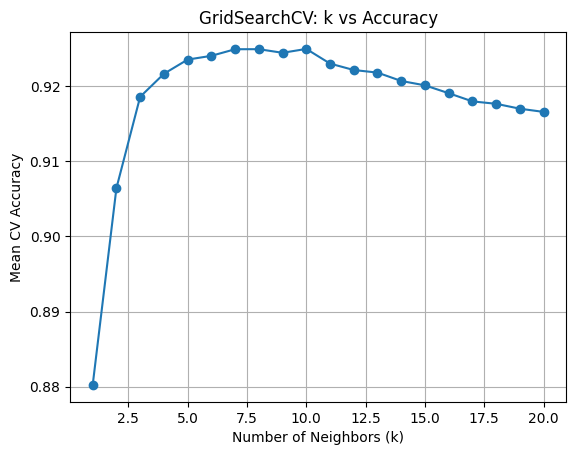

In [58]:

k_vs_acc = (
    result
    .groupby("param_knn__n_neighbors")["mean_test_score"]
    .mean()
)

plt.plot(k_vs_acc.index, k_vs_acc.values, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean CV Accuracy")
plt.title("GridSearchCV: k vs Accuracy")
plt.grid(True)
plt.show()


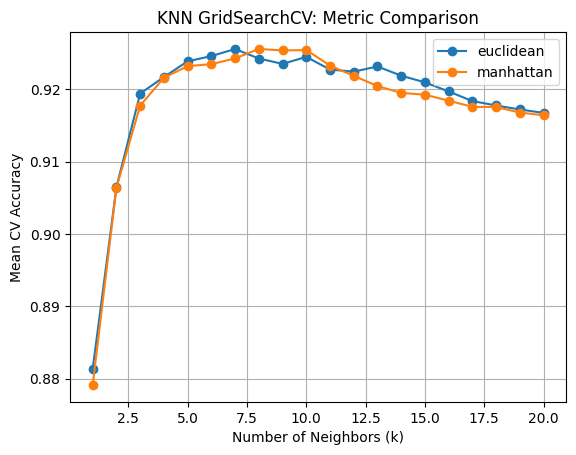

In [61]:
for metric in result["param_knn__metric"].unique():
    subset = result[result["param_knn__metric"] == metric]
    
    k_vs_acc = (
        subset
        .groupby("param_knn__n_neighbors")["mean_test_score"]
        .mean()
    )
    
    plt.plot(k_vs_acc.index, k_vs_acc.values, marker='o', label=metric)

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean CV Accuracy")
plt.title("KNN GridSearchCV: Metric Comparison")
plt.legend()
plt.grid(True)
plt.show()


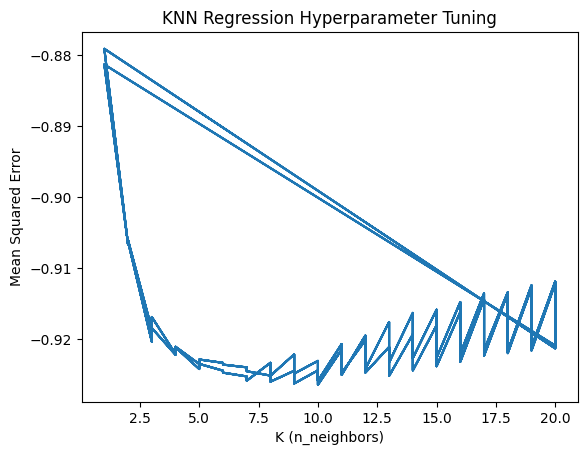

In [64]:
ks = grid.cv_results_["param_knn__n_neighbors"].data.astype(int)
scores = -grid.cv_results_["mean_test_score"]

plt.plot(ks, scores)
plt.xlabel("K (n_neighbors)")
plt.ylabel("Mean Squared Error")
plt.title("KNN Regression Hyperparameter Tuning")
plt.show()


In [68]:
train_r2 = grid.best_estimator_.score(X_train, y_train) #check overfit or not 
test_r2  = grid.best_estimator_.score(X_test, y_test)
"""
    check overfit or not if 
    train_r2 >test_r2 then overfit , they must be equivalent
"""
print(train_r2, test_r2)


1.0 0.921332240911242


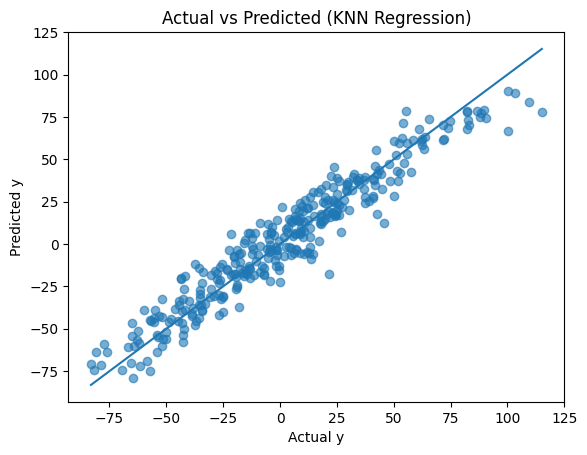

In [72]:
import matplotlib.pyplot as plt

y_pred = grid.best_estimator_.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()]
)
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Actual vs Predicted (KNN Regression)")
plt.show()


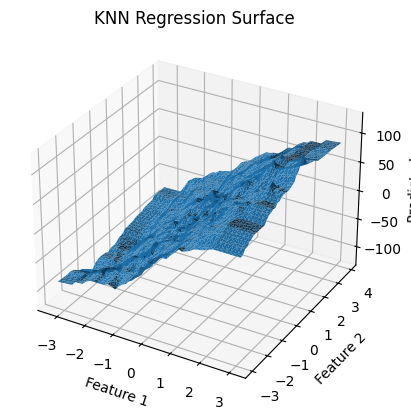

In [73]:

import numpy as np
from mpl_toolkits.mplot3d import Axes3D

x1 = np.linspace(X[:,0].min(), X[:,0].max(), 50)
x2 = np.linspace(X[:,1].min(), X[:,1].max(), 50)
xx1, xx2 = np.meshgrid(x1, x2)

X_grid = np.c_[xx1.ravel(), xx2.ravel()]
y_grid = grid.best_estimator_.predict(X_grid)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(
    X_grid[:,0],
    X_grid[:,1],
    y_grid,
    linewidth=0.2
)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Predicted y")
plt.title("KNN Regression Surface")
plt.show()


so, the at the i conclude that :
r2_score : 0.921332240911242 MAE : 8.85205891756224 MSE : 123.67800108691509